In [62]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [63]:
filename = 'solardb\AnXin-2020-0505.db'
with sqlite3.connect(filename) as con:
    df = pd.read_sql('''select * from inverter_minutely''', con=con)
    
df.LoggedDatetime = pd.to_datetime(df.LoggedDatetime) # datetime的部份，需先做過一次轉換

In [64]:
df1 = df.query('DeviceID == 19')

In [65]:
df1

,UniqueID,DeviceID,LoggedDatetime,AlarmCode,ErrorCode,DC1Voltage,DC2Voltage,DC3Voltage,DC4Voltage,DC1Current,...,HeatSinkTemp,AC1Voltage,AC2Voltage,AC3Voltage,AC1Current,AC2Current,AC3Current,ACFrequency,ACOutputPower,KWH
29,30,19,2020-05-05 05:16:18,0,0,235.0,236.0,235.0,234.0,0.0,...,23,285.0,285.0,283.0,0.0,0.0,0.0,60.1,0.0,24425.0
36,37,19,2020-05-05 05:17:18,0,0,235.0,236.0,235.0,234.0,0.0,...,24,283.0,284.0,281.0,0.0,0.0,0.0,60.1,0.0,24425.0
43,44,19,2020-05-05 05:18:19,0,0,235.0,236.0,235.0,234.0,0.0,...,26,283.0,283.0,281.0,0.0,0.0,0.0,60.0,0.0,24425.0
50,51,19,2020-05-05 05:19:19,0,0,235.0,236.0,235.0,234.0,0.0,...,28,283.0,283.0,281.0,0.0,0.0,0.0,60.0,0.0,24425.0
57,58,19,2020-05-05 05:20:21,85899346080,0,540.0,542.0,541.0,538.0,0.0,...,29,283.0,283.0,281.0,0.0,0.0,0.0,60.1,0.0,24425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5381,5382,19,2020-05-05 19:16:39,0,0,114.0,137.0,181.0,132.0,0.0,...,35,284.0,282.0,281.0,1.7,1.9,1.9,60.0,0.0,24520.0
5382,5383,19,2020-05-05 19:17:54,0,0,114.0,136.0,184.0,130.0,0.0,...,35,283.0,282.0,281.0,1.7,1.9,1.9,60.1,0.0,24520.0
5383,5384,19,2020-05-05 19:19:18,0,0,113.0,135.0,179.0,131.0,0.0,...,35,283.0,283.0,281.0,1.7,1.8,1.9,60.1,0.0,24520.0
5384,5385,19,2020-05-05 19:20:43,0,0,114.0,137.0,181.0,132.0,0.0,...,35,282.0,283.0,281.0,1.7,1.9,1.9,60.1,0.0,24520.0


In [66]:
df2 = df1.query('"2020-05-05 09:00:00" < LoggedDatetime < "2020-05-05 16:00:00"')

Text(0.5, 1.0, 'Zoom In')

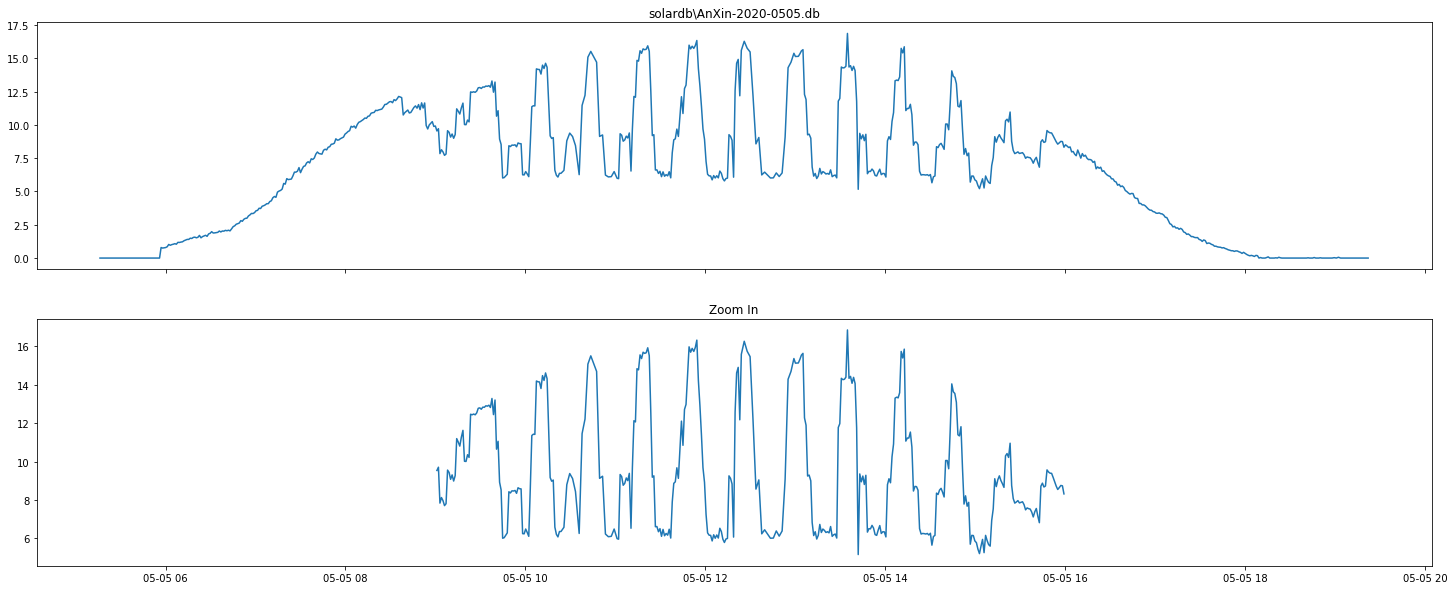

In [70]:
#fig, axes = plt.subplots(1, 2, sharex='col', sharey='row')
#fig.set_figheight(5)
#fig.set_figwidth(15)
fig, axes = plt.subplots(2, 1, sharex='col', sharey='row')
fig.set_figheight(10)
fig.set_figwidth(25)

axes[0].plot(df1.LoggedDatetime, df1.ACOutputPower)
axes[1].plot(df2.LoggedDatetime, df2.ACOutputPower)
axes[0].set_title(filename)
axes[1].set_title('Zoom In'.format(filename))